<a href="https://colab.research.google.com/github/IamArmanNikkhah/DataMining-Preprocess-Absenteeism_at_Work/blob/main/DataMining_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
import math

**Cloning required files**

In [3]:
!git clone https://github.com/IamArmanNikkhah/DataMining-Preprocess-Absenteeism_at_Work.git

Cloning into 'DataMining-Preprocess-Absenteeism_at_Work'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


**Load CSV file**

In [4]:
df = pd.read_csv('/content/DataMining-Preprocess-Absenteeism_at_Work/Absenteeism_at_work.csv')

# Data Pre-processing

**Finding empty cells  in each row**

In [5]:
def empty_cells(df):
    """
    Returns a list of columns with empty cells and the number of them
    """
    empty_cells = []
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            empty_cells.append((col, df[col].isnull().sum()))
    return empty_cells

empty_cells(df)

[('Reason for absence', 3),
 ('Month of absence', 1),
 ('Transportation expense', 7),
 ('Distance from Residence to Work', 3),
 ('Service time', 3),
 ('Age', 3),
 ('Work load Average/day', 10),
 ('Hit target', 6),
 ('Disciplinary failure', 6),
 ('Education', 10),
 ('Son', 6),
 ('Social drinker', 3),
 ('Social smoker', 4),
 ('Pet', 2),
 ('Weight', 1),
 ('Height', 14),
 ('Body mass index', 31),
 ('Absenteeism time in hours', 22)]

**Remove rows that have empty cells in "Absenteeism time in hours" column**

In [6]:
def drop_empty_rows(df, column):
    return df.dropna(subset=[column])
df = drop_empty_rows(df, 'Absenteeism time in hours')

**Calculating null BMI values (if applicable)**


In [7]:
# find empty cells in the BMI column
empty_cell = df['Body mass index'].isnull()

# calculate BMI according to Weight and Height columns if applicable
df.loc[empty_cell, 'Body mass index'] = df.loc[empty_cell, 'Weight'] / (df.loc[empty_cell, 'Height']/100)**2

# check if there are still empty cells in the BMI column
df['Body mass index'].isnull().sum()


2

In [8]:
df[df['Body mass index'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
272,11,19.0,9.0,4,1,289.0,36.0,13.0,33.0,"294,217",...,0.0,1.0,2.0,1.0,NaN,1.0,90.0,NaN,NaN,24.0
273,5,0.0,9.0,5,1,235.0,20.0,13.0,43.0,"294,217",...,1.0,1.0,1.0,1.0,0.0,0.0,106.0,NaN,NaN,0.0


**Delete rows that their BMI can't be calculated**


In [9]:
df = df.dropna(subset=['Body mass index'])

**Finding a list of columns that are highly correlated to each other.**

In [10]:
def highly_correlated(df, threshold=0.8):
    """
    Returns a list of columns that are highly correlated to each other.
    """
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

highly_correlated(df, 0.8)

['Body mass index']

According to the correlation matrix Weight and BMI are highly coorelated so we can ommit Weight column

In [11]:
df.drop('Weight', axis=1, inplace=True)

**converting 'Work load Average/day' data cells from string to integer**

In [12]:
def convert_to_int(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: float(str(x).replace(',', '')))
    return df
df = convert_to_int(df, 'Work load Average/day')

**Filling empty cells in "Transportation expense" , "Distance from Residence to Work", "Service time", "Age", "Work load Average/day", "HIT target", "Son", "Pet" , "Weight" with mean**

In [13]:
empty_cells(df)

[('Reason for absence', 3),
 ('Month of absence', 1),
 ('Transportation expense', 6),
 ('Distance from Residence to Work', 3),
 ('Service time', 3),
 ('Age', 2),
 ('Work load Average/day', 8),
 ('Hit target', 6),
 ('Disciplinary failure', 5),
 ('Education', 10),
 ('Son', 6),
 ('Social drinker', 3),
 ('Social smoker', 3),
 ('Pet', 2),
 ('Height', 12)]

In [14]:
def fillna_mean(df, column_name):
    """
    Get a column from a dataframe and fill empty rows with the average of that column
    """
    column = df[column_name]
    df[column_name] = column.fillna(column.mean())
    return df

def fill_null_with_normal_distribution(df, column_name):
    """
    Fill null cells in a column with normal distribution
    """
    mean = df[column_name].mean()
    std = df[column_name].std()
    null_count = df[column_name].isnull().sum()
    random_list = np.random.randn(null_count)
    random_list = random_list * std + mean
    random_list = random_list.round().astype(int)
    df.loc[df[column_name].isnull(), column_name] = random_list
    return df

df = fill_null_with_normal_distribution(df, 'Reason for absence')
df = fill_null_with_normal_distribution(df, 'Month of absence')
df = fill_null_with_normal_distribution(df, 'Transportation expense')
df = fill_null_with_normal_distribution(df, 'Distance from Residence to Work')
df = fill_null_with_normal_distribution(df, 'Service time')
df = fill_null_with_normal_distribution(df, 'Age')
df = fillna_mean(df, 'Work load Average/day')
df = fill_null_with_normal_distribution(df, 'Hit target')
df = fill_null_with_normal_distribution(df, 'Disciplinary failure')
df = fill_null_with_normal_distribution(df, 'Education')
df = fill_null_with_normal_distribution(df, 'Son')
df = fill_null_with_normal_distribution(df, 'Social drinker')
df = fill_null_with_normal_distribution(df, 'Social smoker')
df = fill_null_with_normal_distribution(df, 'Pet')
df = fill_null_with_normal_distribution(df, 'Height')

**Finding outliners and noises in data and removing them**

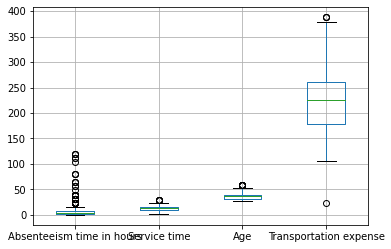

In [15]:
df.boxplot(column=['Absenteeism time in hours', 'Service time', 'Age', 'Transportation expense'])
plt.show()

In [16]:
def find_outliners(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

Absenteeism_outliners   = find_outliners(df, 'Absenteeism time in hours')
df.drop(Absenteeism_outliners.index.tolist(),  inplace=True)

load_outliners          = find_outliners(df, 'Work load Average/day')
df.drop(load_outliners.index.tolist(),         inplace=True)

Service_outliners       = find_outliners(df, 'Service time')
df.drop(Service_outliners.index.tolist(),      inplace=True)

Age_outliners           = find_outliners(df, 'Age')
df.drop(Age_outliners.index.tolist(),          inplace=True)

Transportation_outliners= find_outliners(df, 'Transportation expense')
df.drop(Transportation_outliners.index.tolist(),  inplace=True)

**Removing least coorelated columns with the 'Absenteeism time in hours' column**

In [17]:
def least_correlated(df, col):
    corr_matrix = df.corr().abs()
    corr_col = corr_matrix[col].sort_values(ascending=True)
    return corr_col[:5]

least_correlated(df, 'Absenteeism time in hours')

Pet                                0.006148
Month of absence                   0.006444
Distance from Residence to Work    0.012566
Hit target                         0.014555
Education                          0.018600
Name: Absenteeism time in hours, dtype: float64

'Month of absence' and 'Pet' columns have really low coorelation with the target, so we can remove them

In [18]:
df.drop('Month of absence', axis=1, inplace=True)
df.drop('Pet', axis=1, inplace=True)

**Finding the most important features in a dataframe usuing ExtraTreesClassifier**

In [19]:
def most_important_features(df, n=10):
    """
    Returns a list of the most important features in a dataframe.
    """
    X = df.drop(columns=['Absenteeism time in hours'])
    y = df['Absenteeism time in hours']
    model = ExtraTreesClassifier()
    model.fit(X, y)
    return list(X.columns[model.feature_importances_.argsort()[::-1][:n]])

most_important_features(df,5)

['Reason for absence',
 'Day of the week',
 'Work load Average/day',
 'Hit target',
 'Seasons']

In [20]:
def most_correlated(df, col):
    corr_matrix = df.corr().abs()
    corr_col = corr_matrix[col].sort_values(ascending=False)
    return corr_col[1:10]

most_correlated(df, 'Absenteeism time in hours')

Disciplinary failure      0.276819
Transportation expense    0.177110
ID                        0.170629
Son                       0.147965
Reason for absence        0.136733
Social drinker            0.108599
Age                       0.099221
Day of the week           0.072160
Height                    0.071919
Name: Absenteeism time in hours, dtype: float64

**Checking the relation of each feature with the final result by plotting them**

Text(0, 0.5, 'Absenteeism time in hours')

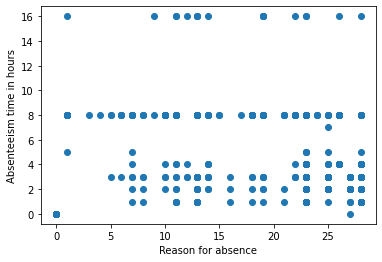

In [21]:
plt.scatter(df['Reason for absence'] , df['Absenteeism time in hours'])
plt.xlabel('Reason for absence')
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Absenteeism time in hours')

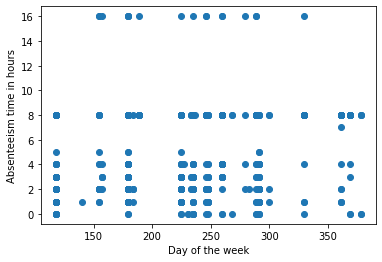

In [ ]:
plt.scatter(df['Day of the week'] , df['Absenteeism time in hours'])
plt.xlabel('Day of the week')
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Work load Average/day')

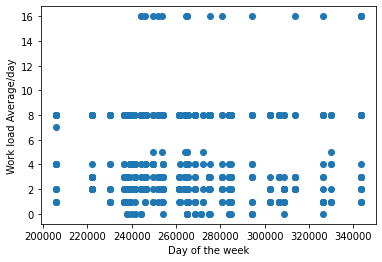

In [29]:
plt.scatter(df['Work load Average/day'] , df['Absenteeism time in hours'])
plt.xlabel('Work load Average/day')
plt.ylabel('Absenteeism time in hours')

Text(0, 0.5, 'Absenteeism time in hours')

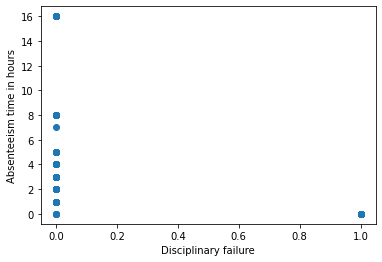

In [31]:
plt.scatter(df['Disciplinary failure'] , df['Absenteeism time in hours'])
plt.xlabel('Disciplinary failure')
plt.ylabel('Absenteeism time in hours')

Calculating the average, variance, and domain of change in every column of the data frame

In [22]:
def calculate_statistics(data_frame):
    """
    Calculate the average, variance, and domain of change in every column of the data frame
    """
    # Calculate the average of every column
    average = data_frame.mean()
    # Calculate the variance of every column
    variance = data_frame.var()
    # Calculate the domain of change of every column
    domain_of_change = data_frame.max() - data_frame.min()
    # Return the average, variance, and domain of change
    return average, variance, domain_of_change

calculate_statistics(df)

(ID                                     18.333879
 Reason for absence                     19.815057
 Day of the week                         3.934534
 Seasons                                 2.518822
 Transportation expense                220.114566
 Distance from Residence to Work        29.538462
 Service time                           12.265139
 Age                                    36.001637
 Work load Average/day              266831.495364
 Hit target                             94.674304
 Disciplinary failure                    0.045827
 Education                               1.320786
 Son                                     1.032733
 Social drinker                          0.545008
 Social smoker                           0.075286
 Height                                171.855974
 Body mass index                        26.665454
 Absenteeism time in hours               4.374795
 dtype: float64, ID                                 1.220916e+02
 Reason for absence                

**Visualizing data using PCA and UMAP**

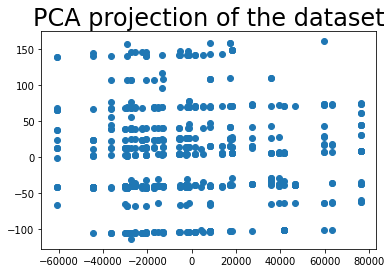

In [23]:
def apply_pca(df, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(df)
    pca_df = pd.DataFrame(pca.transform(df))
    return pca_df

pf = apply_pca(df, 2)
plt.scatter(pf[0], pf[1],cmap='Spectral')
#plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the dataset', fontsize=24);

Installing UMAP

In [ ]:
!pip install umap-learn

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


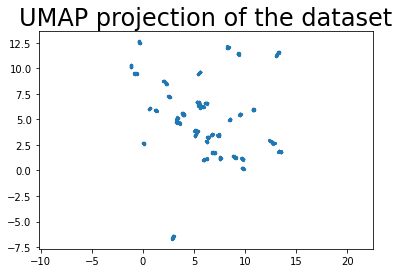

In [25]:
import umap
def umap_visualize(df, n_neighbors=15, min_dist=0.1, n_components=8, metric='euclidean'):
    """
    Apply UMAP on a dataframe and visualize the result
    """
    # Apply UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors,
                        min_dist=min_dist,
                        n_components=n_components,
                        metric=metric)
    embedding = reducer.fit_transform(df)
    
    # Visualize the result
    plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the dataset', fontsize=24);
    
    return embedding

# Apply UMAP on the dataframe
embedding = umap_visualize(df)

**Removing noise datas using PCA**

In [26]:
pf = apply_pca(df, 2)
def outliers(df, coe_step = 1.5):
    outliers = []
    for col in df.columns:
        if df[col].dtype != object:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outlier_step = coe_step * IQR
            outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
            outliers.extend(outlier_list_col)
    return outliers

outliers_indx = outliers(pf,1.4)
pf.drop(outliers_indx, inplace=True)

**Clustring *Data***

Text(0.5, 0, 'n_components')

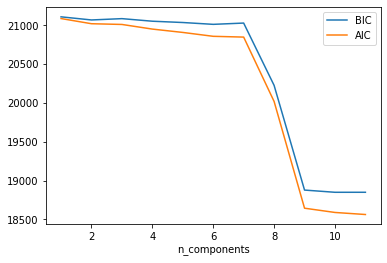

In [27]:
#pf = apply_pca(df, 2)
from sklearn.mixture import GaussianMixture
def cluster_data(df, n_clusters):
    """
    Cluster a dataframe using Gaussian Mixture model
    """
    # Create a Gaussian Mixture model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    # Fit the model to the data
    gmm.fit(df)
    # Predict the labels
    labels = gmm.predict(df)
    # Return the labels
    return labels

n_components = np.arange(1, 12)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(pf) for n in n_components]
plt.plot(n_components, [m.bic(pf) for m in models], label='BIC')
plt.plot(n_components, [m.aic(pf) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

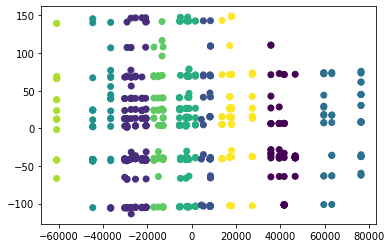

In [28]:
labels = cluster_data(pf, 9)
plt.scatter(pf[0], pf[1], c=labels, cmap='viridis')